### Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#imports
import scipy.io
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import obspy
import pywt
import pywt.data

### Load the trimmed data 

In [3]:
dir_path = "/Users/ecem/Desktop/gyrocardiogram/data/"

In [4]:
mr_ = np.load(dir_path + "/mr-10.npy", allow_pickle= True)
ms_ = np.load(dir_path + "/ms-10.npy", allow_pickle= True)
as_ = np.load(dir_path + "/as-10.npy", allow_pickle= True)
ar_ = np.load(dir_path + "/ar-10.npy", allow_pickle= True)

In [5]:
print(ms_.shape)
print(mr_.shape)
print(ar_.shape)
print(as_.shape)

(3, 143, 2560)
(3, 591, 2560)
(3, 242, 2560)
(3, 380, 2560)


## Let's look at wavelet decomposition for a signal piece

#### how our decomposition filter values look like

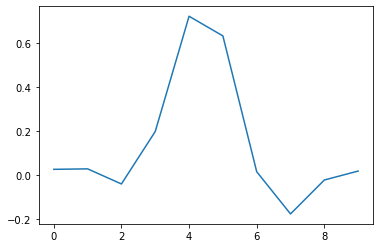

In [6]:
w = pywt.Wavelet('sym5')
plt.plot(w.dec_lo)
coeffs = pywt.wavedec(mr_[0][0], w, level=6)

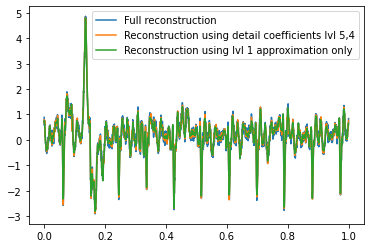

In [7]:
def reconstruction_plot(yyy, **kwargs):
    """Plot signal vector on x [0,1] independently of amount of values it contains."""
    plt.plot(np.linspace(0, 1, len(yyy)), yyy, **kwargs)

reconstruction_plot(pywt.waverec(coeffs, w)) # full reconstruction 
reconstruction_plot(pywt.waverec(coeffs[:-1] + [None] * 1, w)) # leaving out detail coefficients up to lvl 5
reconstruction_plot(pywt.waverec(coeffs[:-2] + [None] * 2, w)) # leaving out detail coefficients up to lvl 4
#reconstruction_plot(pywt.waverec(coeffs[:-3] + [None] * 3, w)) # leaving out detail coefficients up to lvl 3
#reconstruction_plot(pywt.waverec(coeffs[:-4] + [None] * 4, w)) # leaving out detail coefficients up to lvl 2
#reconstruction_plot(pywt.waverec(coeffs[:-5] + [None] * 5, w)) # leaving out detail coefficients up to lvl 1
#reconstruction_plot(pywt.waverec(coeffs[:-6] + [None] * 6, w)) # leaving out all detail coefficients = reconstruction using lvl1 approximation only
plt.legend(['Full reconstruction', 'Reconstruction using detail coefficients lvl 5,4', 'Reconstruction using lvl 1 approximation only'])

Amplitude of the coefficient corresponds to amplitude with which the wavelet occurs in the signal (y axis), and position of the coefficient corresponds to the time (x axis). 

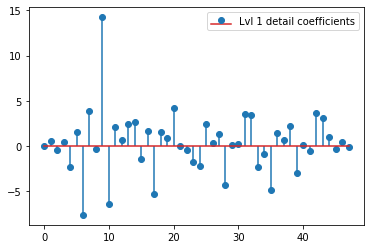

In [8]:
plt.stem(coeffs[1]); plt.legend(['Lvl 1 detail coefficients'])

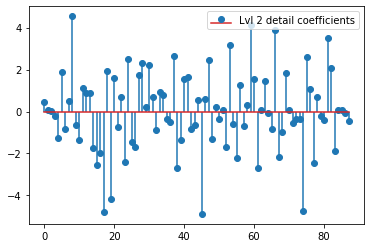

In [9]:
plt.stem(coeffs[2]); plt.legend(['Lvl 2 detail coefficients'])


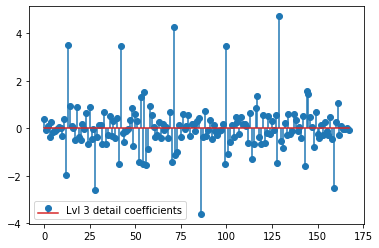

In [10]:
plt.stem(coeffs[3]); plt.legend(['Lvl 3 detail coefficients'])


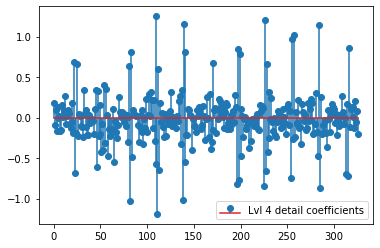

In [11]:
plt.stem(coeffs[4]); plt.legend(['Lvl 4 detail coefficients'])


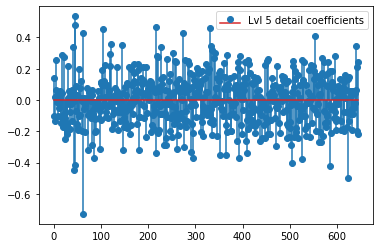

In [12]:
plt.stem(coeffs[5]); plt.legend(['Lvl 5 detail coefficients'])


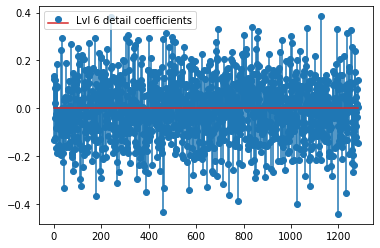

In [13]:
plt.stem(coeffs[6]); plt.legend(['Lvl 6 detail coefficients'])

In [14]:
# Reconstruction of signal using just lvl1 approximation
approx_lvl1 = pywt.waverec(coeffs[:-6] + [None] * 6, w)
# interpolate to original amount of samples (necessary due to numeric solution of transformation not yielding same amount of values)
approx_lvl1_interp = np.interp(x=np.arange(0, len(mr_[0][0])), xp=np.linspace(0, 525, len(approx_lvl1)), fp=approx_lvl1)
x_without_lvl1approx = mr_[0][0] - approx_lvl1_interp

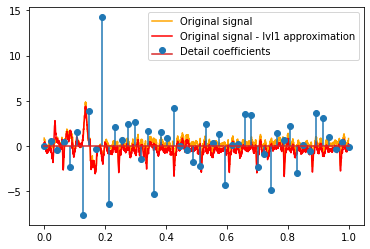

In [15]:
def reconstruction_stem(yyy, **kwargs):
    """Plot coefficient vector on x [0,1] independently of amount of values it contains."""
    plt.stem(np.linspace(0, 1, len(yyy)), yyy, **kwargs)

reconstruction_plot(mr_[0][0], color='orange')
reconstruction_plot(x_without_lvl1approx, color='red')
reconstruction_stem(coeffs[1])
plt.legend(['Original signal', 'Original signal - lvl1 approximation', 'Detail coefficients'])

### Now let's get coef for all pieces

In [16]:
coef_mr_x, coef_mr_y, coef_mr_z = [], [], []
for i in range(len(mr_[1])):
    coef_mr_x.append(pywt.wavedec(mr_[0][i], w, level=6))
    coef_mr_y.append(pywt.wavedec(mr_[1][i], w, level=6))
    coef_mr_z.append(pywt.wavedec(mr_[2][i], w, level=6))

In [17]:
coef_ar_x, coef_ar_y, coef_ar_z = [], [], []
for i in range(len(ar_[1])):
    coef_ar_x.append(pywt.wavedec(ar_[0][i], w, level=6))
    coef_ar_y.append(pywt.wavedec(ar_[1][i], w, level=6))
    coef_ar_z.append(pywt.wavedec(ar_[2][i], w, level=6))

In [18]:
coef_ms_x, coef_ms_y, coef_ms_z = [], [], []
for i in range(len(ms_[1])):
    coef_ms_x.append(pywt.wavedec(ms_[0][i], w, level=6))
    coef_ms_y.append(pywt.wavedec(ms_[1][i], w, level=6))
    coef_ms_z.append(pywt.wavedec(ms_[2][i], w, level=6))

In [19]:
coef_as_x, coef_as_y, coef_as_z = [], [], []
for i in range(len(as_[1])):
    coef_as_x.append(pywt.wavedec(as_[0][i], w, level=6))
    coef_as_y.append(pywt.wavedec(as_[1][i], w, level=6))
    coef_as_z.append(pywt.wavedec(as_[2][i], w, level=6))

In [20]:
import pandas as pd

In [21]:
mr = np.stack((coef_mr_x, coef_mr_y, coef_mr_z), axis = 0)
ar = np.stack((coef_ar_x, coef_ar_y, coef_ar_z), axis = 0)
ms = np.stack((coef_ms_x, coef_ms_y, coef_ms_z), axis = 0)
ass = np.stack((coef_as_x, coef_as_y, coef_as_z), axis = 0)

In [22]:
mr.shape

(3, 591, 7)

In [23]:
mr[0][9][0]

array([ 2.91028098,  1.90930638,  1.88663512,  2.29285778, -1.42333495,
        1.16991265,  0.22105837, -0.63735202,  2.23503661,  6.15616569,
        5.22433377, -1.92278772,  2.39945529,  0.06721975, -0.62596794,
        0.53143159,  0.7992671 ,  2.63243222, -0.02567465,  2.85748506,
       -0.11048757,  0.40322404,  2.08774098,  5.03222226,  1.64242667,
       -2.99462938,  2.25554415,  0.07153135,  0.44156831,  0.69414856,
        2.58216945,  1.54352045, -2.34892711,  2.34525199,  5.15999477,
        4.76803477, -1.82278625,  1.51585309,  1.06804503,  0.75853953,
        2.93397639,  2.96898207,  5.65147069, -2.34935121,  0.41278394,
       -0.03737285, -0.04214516,  0.27711292])

### Level by level

In [24]:
def level_coef_extractor_3d(array, lvl = 0):
    
    lenn = array[0][0][lvl].shape[0] #48
    coef = np.ones(shape = (array.shape[0], array.shape[1], lenn)) #219,48
    
    for i in range(array.shape[1]):
        coef[0,i,:] = array[0][i][lvl]
        coef[1,i,:] = array[1][i][lvl]
        coef[2,i,:] = array[2][i][lvl]
        
    return coef

In [25]:
def saver(array = 0, lvl = 0, dir_path = None, name = 'blank'):
    coefs = level_coef_extractor_3d(array, lvl)
    np.save(dir_path + "/"+ str(name) + "_lvl_"  + str(lvl), coefs, allow_pickle = True)
    del coefs

In [26]:
for i in range(7):
    saver(mr, i, dir_path, 'mr')
    saver(ms, i, dir_path, 'ms')
    saver(ass, i, dir_path, 'as')
    saver(ar, i, dir_path, 'ar')